In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import wordcloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

/home/abdo/.local/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [85]:
data = pd.read_csv("sms-spam-collection-dataset/spam.csv",encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [86]:
data.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)

In [87]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [88]:
data.columns=["class","sms"]
data.head()

,class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [89]:
data["class"].value_counts()

ham     4825
spam     747
Name: class, dtype: int64

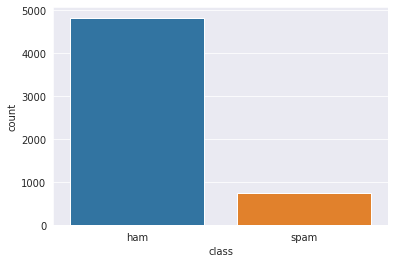

In [90]:
sns.countplot('class',data=data);

In [91]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
data["class"]=lb.fit_transform(data["class"])
data.head()

,class,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [92]:
data['length'] = data['sms'].apply(len)
data.head()

,class,sms,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


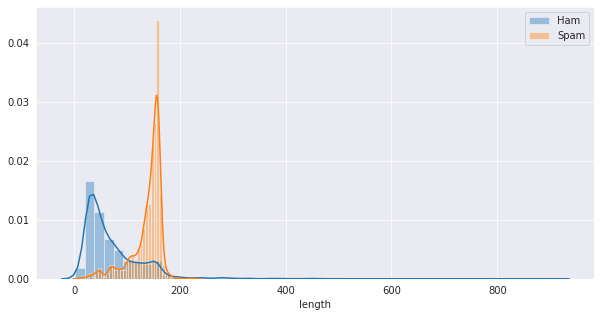

In [93]:
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
sns.distplot(data[data["class"]==0]["length"],label="Ham");
sns.distplot(data[data["class"]==1]["length"],label="Spam");
plt.legend();
plt.show()

### word cloud:(tag cloud)
- represent the frequency or the importance of each word.

In [94]:
data_ham  = data[data['class'] == 0].copy()
data_spam = data[data['class'] == 1].copy()

In [95]:
from wordcloud import WordCloud, STOPWORDS

In [96]:
data_ham["sms"].values[20]

"I'm back &amp; we're packing the car now, I'll let you know if there's room"

In [98]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(data_ham["sms"].values[20])

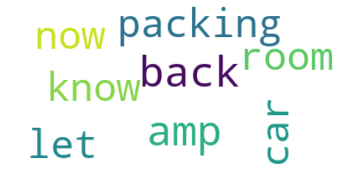

In [99]:
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Ham WordCloud

In [100]:
data2=data.copy()

In [58]:
ham_text = " ".join(sms for sms in data_ham.sms)
print ("There are {} words in the combination of all review.".format(len(ham_text)))

There are 347513 words in the combination of all review.


In [102]:
ham_text

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... Ok lar... Joking wif u oni... U dun say so early hor... U c already then say... Nah I don\'t think he goes to usf, he lives around here though Even my brother is not like to speak with me. They treat me like aids patent. As per your request \'Melle Melle (Oru Minnaminunginte Nurungu Vettam)\' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune I\'m gonna be home soon and i don\'t want to talk about this stuff anymore tonight, k? I\'ve cried enough today. I\'ve been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times. I HAVE A DATE ON SUNDAY WITH WILL!! Oh k...i\'m watching here:) Eh u remember how 2 spell his name... Yes i did. He v naughty make until i v wet. Fine if thatåÕs the way u feel. ThatåÕs the wa

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 'ours',
 '

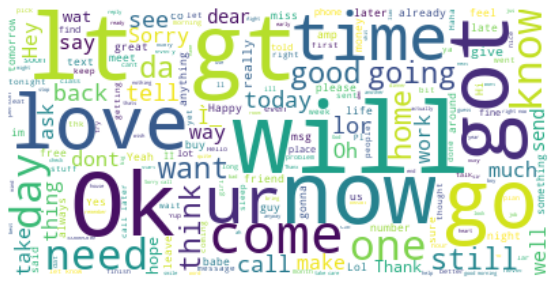

In [59]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(ham_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Sapm wordcloud

In [60]:
spam_text = " ".join(sms for sms in data_spam.sms)
print ("There are {} words in the combination of all review.".format(len(spam_text)))

There are 104479 words in the combination of all review.


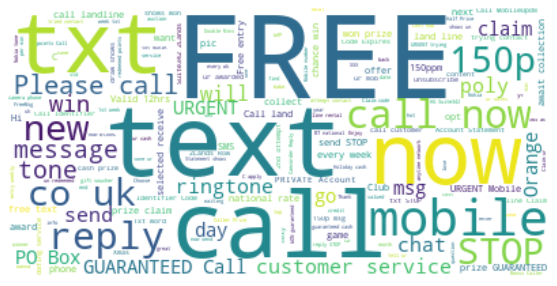

In [61]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(spam_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [116]:
import re

cleaned=[re.sub("[^\w]+"," ",data.sms.values[25]).replace("  "," ").strip()]
str_clean = "".join(cleaned).split(" ")
print(cleaned)
print(str_clean)


['Just forced myself to eat a slice I m really not hungry tho This sucks Mark is getting worried He knows I m sick when I turn down pizza Lol']
['Just', 'forced', 'myself', 'to', 'eat', 'a', 'slice', 'I', 'm', 'really', 'not', 'hungry', 'tho', 'This', 'sucks', 'Mark', 'is', 'getting', 'worried', 'He', 'knows', 'I', 'm', 'sick', 'when', 'I', 'turn', 'down', 'pizza', 'Lol']


In [118]:
sms_no_punctuation_no_stopwords = \
[word.lower() for word in str_clean if word.lower() not in stopwords]
# str_clean = "".join(sms_no_punctuation_no_stopwords).split(" ")

In [64]:
print(cleaned),print(sms_no_punctuation_no_stopwords)

['FreeMsg Hey there darling it s been 3 week s now and no word back I d like some fun you up for it still Tb ok XxX std chgs to send å 1 50 to rcv']
['freemsg', 'hey', 'darling', 's', '3', 'week', 's', 'now', 'word', 'back', 'd', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'send', 'å', '1', '50', 'rcv']


(None, None)

In [65]:
import string
def clean_str(msg):
    cleaned=[re.sub("[^\w]+"," ",msg).replace("  "," ").strip()]
    no_punc = "".join(cleaned).split(" ")
    no_stop_words =[word.lower() for word in no_punc if word.lower() not in stopwords]
        
    return no_stop_words

In [66]:
data["sms"]=data["sms"].apply(clean_str)

In [67]:
data_ham  = data[data['class'] == 0].copy()
data_spam = data[data['class'] == 1].copy()

In [68]:
data_ham.head()

,class,sms,length
0,0,"[go, jurong, point, crazy, available, bugis, n...",111
1,0,"[ok, lar, joking, wif, u, oni]",29
3,0,"[u, dun, say, early, hor, u, c, already, say]",49
4,0,"[nah, don, t, think, goes, usf, lives, around,...",61
6,0,"[even, brother, speak, treat, aids, patent]",77


In [69]:
words_data_ham = data_ham['sms'].tolist()
words_data_spam = data_spam['sms'].tolist()

In [119]:
words_data_ham

[['go',
  'jurong',
  'point',
  'crazy',
  'available',
  'bugis',
  'n',
  'great',
  'world',
  'la',
  'e',
  'buffet',
  'cine',
  'got',
  'amore',
  'wat'],
 ['ok', 'lar', 'joking', 'wif', 'u', 'oni'],
 ['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say'],
 ['nah', 'don', 't', 'think', 'goes', 'usf', 'lives', 'around', 'though'],
 ['even', 'brother', 'speak', 'treat', 'aids', 'patent'],
 ['per',
  'request',
  'melle',
  'melle',
  'oru',
  'minnaminunginte',
  'nurungu',
  'vettam',
  'set',
  'callertune',
  'callers',
  'press',
  '9',
  'copy',
  'friends',
  'callertune'],
 ['m',
  'gonna',
  'home',
  'soon',
  'don',
  't',
  'want',
  'talk',
  'stuff',
  'anymore',
  'tonight',
  've',
  'cried',
  'enough',
  'today'],
 ['ve',
  'searching',
  'right',
  'words',
  'thank',
  'breather',
  'promise',
  'wont',
  'take',
  'help',
  'granted',
  'will',
  'fulfil',
  'promise',
  'wonderful',
  'blessing',
  'times'],
 ['date', 'sunday', 'will'],
 ['oh', 'm',

In [70]:
list_ham_words = []
for sublist in words_data_ham:
    for item in sublist:
        list_ham_words.append(item)

In [71]:
list_ham_words

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat',
 'ok',
 'lar',
 'joking',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'early',
 'hor',
 'u',
 'c',
 'already',
 'say',
 'nah',
 'don',
 't',
 'think',
 'goes',
 'usf',
 'lives',
 'around',
 'though',
 'even',
 'brother',
 'speak',
 'treat',
 'aids',
 'patent',
 'per',
 'request',
 'melle',
 'melle',
 'oru',
 'minnaminunginte',
 'nurungu',
 'vettam',
 'set',
 'callertune',
 'callers',
 'press',
 '9',
 'copy',
 'friends',
 'callertune',
 'm',
 'gonna',
 'home',
 'soon',
 'don',
 't',
 'want',
 'talk',
 'stuff',
 'anymore',
 'tonight',
 've',
 'cried',
 'enough',
 'today',
 've',
 'searching',
 'right',
 'words',
 'thank',
 'breather',
 'promise',
 'wont',
 'take',
 'help',
 'granted',
 'will',
 'fulfil',
 'promise',
 'wonderful',
 'blessing',
 'times',
 'date',
 'sunday',
 'will',
 'oh',
 'm',
 'watching',
 'eh',
 'u',
 'remember',
 '2',
 'sp

In [29]:
list_spam_words = []
for sublist in words_data_spam:
    for item in sublist:
        list_spam_words.append(item)

In [30]:
list_spam_words

['free',
 'entry',
 '2',
 'wkly',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 '21st',
 'may',
 '2005',
 'text',
 'fa',
 '87121',
 'receive',
 'entry',
 'question',
 'std',
 'txt',
 'rate',
 't',
 'c',
 's',
 'apply',
 '08452810075over18',
 's',
 'freemsg',
 'hey',
 'darling',
 's',
 '3',
 'week',
 's',
 'now',
 'word',
 'back',
 'd',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chgs',
 'send',
 'å',
 '1',
 '50',
 'rcv',
 'winner',
 'valued',
 'network',
 'customer',
 'selected',
 'receivea',
 'å',
 '900',
 'prize',
 'reward',
 'claim',
 'call',
 '09061701461',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hours',
 'mobile',
 '11',
 'months',
 'u',
 'entitled',
 'update',
 'latest',
 'colour',
 'mobiles',
 'camera',
 'free',
 'call',
 'mobile',
 'update',
 'co',
 'free',
 '08002986030',
 'six',
 'chances',
 'win',
 'cash',
 '100',
 '20',
 '000',
 'pounds',
 'txt',
 'csh11',
 'send',
 '87575',
 'cost',
 '150p',
 'day',
 '6days',
 '16',
 'tsandcs',
 'apply',
 'reply',
 'hl'

# Counter library 

In [31]:
from collections import Counter

In [32]:
c_ham  = Counter(list_ham_words)
c_spam = Counter(list_spam_words)
df_hamwords_top30  = pd.DataFrame(c_ham.most_common(30),  columns=['word', 'count'])
df_spamwords_top30 = pd.DataFrame(c_spam.most_common(30), columns=['word', 'count'])

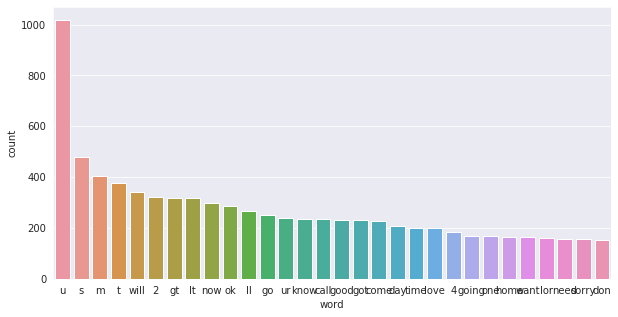

In [33]:
plt.figure(figsize=(10,5))
sns.barplot(x=df_hamwords_top30["word"],y=df_hamwords_top30["count"])

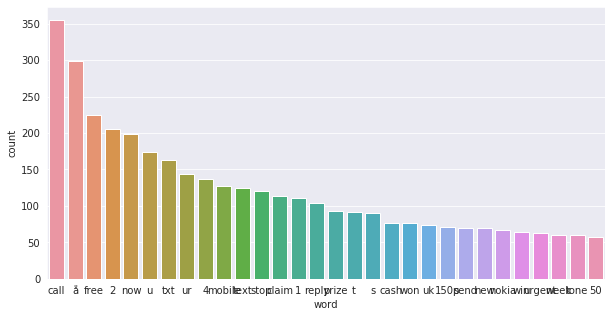

In [34]:
plt.figure(figsize=(10,5))
sns.barplot(x=df_spamwords_top30["word"],y=df_spamwords_top30["count"])

### Bag of Words: In Bag of words model we find the ‘term frequency’, i.e. number of occurrences of each word in the dataset.

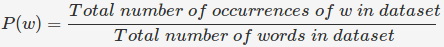

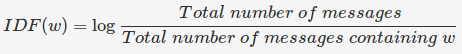

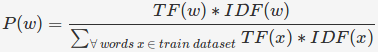

In [40]:
data["sms"].head()

0    [go, jurong, point, crazy, available, bugis, n...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, 2, wkly, comp, win, fa, cup, fin...
3        [u, dun, say, early, hor, u, c, already, say]
4    [nah, don, t, think, goes, usf, lives, around,...
Name: sms, dtype: object

In [72]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer = clean_str).fit(data2['sms'])

In [73]:
print(len(bow_transformer.vocabulary_))

8580


In [75]:
sample_spam = data2['sms'][8]
bow_sample_spam = bow_transformer.transform([sample_spam])
print(sample_spam)
print(bow_sample_spam)

WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
  (0, 226)	1
  (0, 325)	1
  (0, 827)	1
  (0, 1804)	1
  (0, 2043)	2
  (0, 2109)	1
  (0, 2386)	1
  (0, 3914)	1
  (0, 4396)	1
  (0, 5271)	1
  (0, 6013)	1
  (0, 6239)	1
  (0, 6402)	1
  (0, 6650)	1
  (0, 8015)	1
  (0, 8019)	1
  (0, 8324)	1
  (0, 8556)	1


In [76]:
bow_data = bow_transformer.transform(data2['sms'])

In [77]:
bow_data.shape

(5572, 8580)

In [122]:
bow_data.A

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## https://scikit-learn.org/stable/modules/feature_extraction.html#sparsity

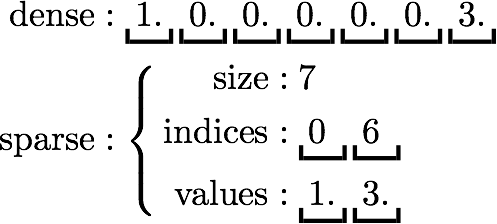

# For each word w in the processed messaged we find a product of P(w|spam). If w does not exist in the train dataset we take TF(w) as 0 and find P(w|spam) using above formula. We multiply this product with P(spam) The resultant product is the P(spam|message). Similarly, we find P(ham|message). Whichever probability among these two is greater, the corresponding tag (spam or ham) is assigned to the input message

In [146]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit_transform(bow_data)

In [147]:
len(tfidf_transformer.A[0])

8580

In [148]:
len(tfidf_transformer.A[1])

8580

In [149]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train ,y_test = \
    train_test_split(tfidf_transformer, data["class"], test_size=0.3, random_state=5)

# Before Scaling

In [150]:
spam_detect_model = MultinomialNB().fit(X_train.A, y_train)
pred_test_MNB = spam_detect_model.predict(X_test.A)

In [151]:
acc_MNB = accuracy_score(y_test, pred_test_MNB)
print(acc_MNB)

0.9671052631578947


# After scaling

In [163]:
from sklearn.preprocessing import MinMaxScaler

In [152]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train.A)
X_test  = scaler.transform(X_test.A)

In [154]:
spam_detect_model = MultinomialNB().fit(X_train, y_train)
pred_test_MNB = spam_detect_model.predict(X_test)

In [155]:
acc_MNB = accuracy_score(y_test, pred_test_MNB)
print(acc_MNB)

0.9826555023923444


In [156]:
from mlxtend.plotting import plot_confusion_matrix

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4be02dc588>)

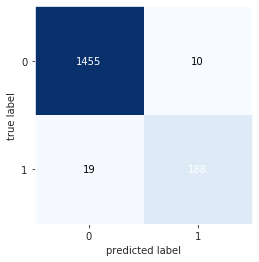

In [157]:
plot_confusion_matrix(confusion_matrix(y_test, pred_test_MNB))

In [160]:
from sklearn.linear_model import SGDClassifier
spam_detect_model = SGDClassifier().fit(X_train, y_train)
pred_test_MNB = spam_detect_model.predict(X_test)

In [161]:
acc_MNB = accuracy_score(y_test, pred_test_MNB)
print(acc_MNB)

0.9850478468899522


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4be049b470>)

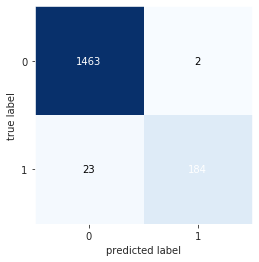

In [162]:
plot_confusion_matrix(confusion_matrix(y_test, pred_test_MNB))